# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Replace spaces with %20 to ensure url correctness
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#OpenWeatherMap API Key
api_key = api_keys.api_key

#starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [9]:
#Create empty lists to append the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#start the call counter
record = 1

#log file print statement
print(f'Beginning Data Retrieval')
print(f'------------------------')

#loop through the cities in the city list
for city in cities:
    
    #Try statement to append calls where value is found
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        #increase counter by one
        record= record + 1
        
        #wait a second in loop to not over exceed rate limit of API
        time.sleep(1.00)
        
    #if no record is found skip to next call
    except:
        print('City not found.  Skipping...')
        

Beginning Data Retrieval
------------------------
Processing Record 1 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=arraial%20do%20cabo
Processing Record 2 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ribeira%20grande
Processing Record 3 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=new%20norfolk
Processing Record 4 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=rikitea
Processing Record 5 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=puerto%20ayora
Processing Record 6 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=pevek
Processing Record 7 | Xam Nua
http://api.openweath

Processing Record 57 | Colonial Heights
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=colonial%20heights
Processing Record 58 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ushuaia
Processing Record 59 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=bandarbeyla
Processing Record 60 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=kaitangata
Processing Record 61 | Blagoyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=blagoyevo
Processing Record 62 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=strezhevoy
Processing Record 63 | Whyalla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110

Processing Record 111 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=port%20elizabeth
City not found.  Skipping...
Processing Record 112 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=tuktoyaktuk
Processing Record 113 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=saint%20george
Processing Record 114 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=bluff
Processing Record 115 | Ngong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ngong
Processing Record 116 | Aljezur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=aljezur
Processing Record 117 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=I

City not found.  Skipping...
Processing Record 166 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=palmer
Processing Record 167 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=airai
Processing Record 168 | Yanacancha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=yanacancha
Processing Record 169 | Cananea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=cananea
Processing Record 170 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=nome
Processing Record 171 | Solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=solnechnyy
Processing Record 172 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5

Processing Record 220 | Groningen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=groningen
City not found.  Skipping...
Processing Record 221 | Barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=barcelos
Processing Record 222 | San Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=san%20pedro
Processing Record 223 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=pangnirtung
Processing Record 224 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=dikson
Processing Record 225 | Lazurne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=lazurne
Processing Record 226 | La Celia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 276 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=khatanga
Processing Record 277 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=talnakh
Processing Record 278 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=port%20hardy
Processing Record 279 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=hasaki
Processing Record 280 | Ekhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ekhabi
Processing Record 281 | Lakselv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=lakselv
Processing Record 282 | Rabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=rab

Processing Record 331 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=portland
Processing Record 332 | Kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=kangaatsiaq
Processing Record 333 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=nemuro
Processing Record 334 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ketchikan
Processing Record 335 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=broome
Processing Record 336 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=petropavlovsk-kamchatskiy
Processing Record 337 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 386 | Kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=kharp
Processing Record 387 | Severo-Yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=severo-yeniseyskiy
Processing Record 388 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=chernyshevskiy
Processing Record 389 | Bhadrachalam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=bhadrachalam
Processing Record 390 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=saint%20anthony
Processing Record 391 | Ichinohe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=ichinohe
Processing Record 392 | The Valley
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 441 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=bethel
Processing Record 442 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=hay%20river
Processing Record 443 | Jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=jizan
Processing Record 444 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=makakilo%20city
Processing Record 445 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=muros
Processing Record 446 | Midland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=midland
Processing Record 447 | Mago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=

Processing Record 497 | Bonfim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=bonfim
Processing Record 498 | Qarchi Gak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=qarchi%20gak
Processing Record 499 | Indianola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=indianola
Processing Record 500 | Imeni Poliny Osipenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=imeni%20poliny%20osipenko
Processing Record 501 | Storslett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=storslett
Processing Record 502 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce110728f420a5ce99d2938f7ac6da8e&q=sioux%20lookout
Processing Record 503 | Beloha
http://api.openweathermap.org/data/2.5/weather?unit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#create a dictionary with generated list
weather_dict = {
    'City':city_name,
    'Cloudiness':cloudiness,
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}

#create a dataframe using new dictionary
weather_data = pd.DataFrame(weather_dict)

#show count of weather values
weather_data.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

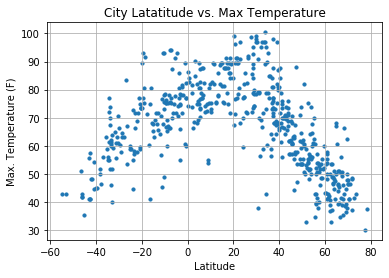

In [20]:
#build a scatter plot for data types and specify properties
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', s=10)
plt.title('City Latatitude vs. Max Temperature')
plt.ylabel('Max. Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#I could not get the figure to save

#show plot
plt.show()


#### Latitude vs. Humidity Plot

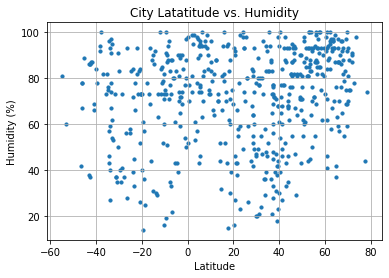

In [22]:
#build a scatter plot for data types and specify properties
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', s=10)
plt.title('City Latatitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#I could not get the figure to save
#show plt
plt.show()

#### Latitude vs. Cloudiness Plot

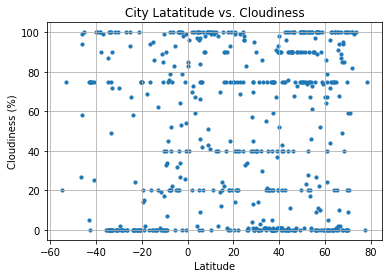

In [23]:
#build a scatter plot for data types and specify properties
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', s=10)
plt.title('City Latatitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#I could not get the figure to save
#show plt
plt.show()

#### Latitude vs. Wind Speed Plot

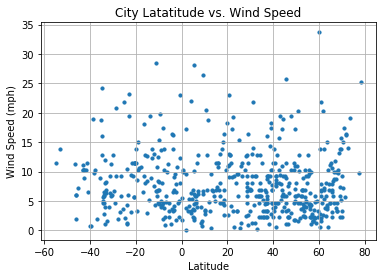

In [25]:
#build a scatter plot for data types and specify properties
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', s=10)
plt.title('City Latatitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#I could not get the figure to save
#show plt
plt.show()

Observable Trends:

1. The temperature does increase the closer the location is to the equator.
2. Cloudiness and Humidity don't seem to show very much correlation
3. There is evidence that wind speed does increase in areas further away from the equator.